## **Problem Statement:**
To predict the onset of diabetes in female patients of Pima Indian heritage based on diagnostic measurements such as number of pregnancies, glucose level, blood pressure, skin thickness, insulin level, BMI, diabetes pedigree function, and age.
The goal is to build a model that can accurately classify whether a Pima Indian woman has diabetes or not based on her medical information. This can be used to identify individuals at high risk of developing diabetes and potentially intervene early to prevent or manage the disease.


# **Data Dictionary:**
preg: Number of times pregnant.

plas: Plasma glucose concentration a 2 hours in an oral glucose tolerance test.

pres: Diastolic blood pressure (mm Hg).

skin: Triceps skin fold thickness (mm).

test: 2-Hour serum insulin (mu U/ml).

mass: Body mass index (weight in kg/(height in m)^2).

pedi: Diabetes pedigree function.

age: Age (years).

class: Class variable (0 or 1) indicating whether the patient has diabetes or not (1: diabetic, 0: not diabetic).


Importing **Libraries**

In [ ]:
import pandas as pd
import numpy as np
# importing seaborn for statistical plots
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
# calculate accuracy measures and confusion matrix
from sklearn import metrics


Uploadin **Dataset**

In [ ]:
dai_df=pd.read_csv("pima-indians-diabetes.csv")

Display 5 **Records**

In [ ]:
dai_df.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Display number of **rows**

In [ ]:
dai_df.shape

(768, 9)

**Display all datatypes**

In [ ]:
dai_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Preg    768 non-null    int64  
 1   Plas    768 non-null    int64  
 2   Pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**5 points summery data**

In [ ]:
dai_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Preg,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Plas,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
Pres,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
skin,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
test,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
mass,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
pedi,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
class,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


**To check null values**

In [ ]:
dai_df.isnull().sum()

,0
Preg,0
Plas,0
Pres,0
skin,0
test,0
mass,0
pedi,0
age,0
class,0


In [ ]:
dai_df.dtypes

,0
Preg,int64
Plas,int64
Pres,int64
skin,int64
test,int64
mass,float64
pedi,float64
age,int64
class,int64


In [ ]:
# Let us check whether any of the columns has any value other than numeric i.e. data is not corrupted such as a "?" instead of
# a number.

# we use np.isreal a numpy function which checks each column for each row and returns a bool array,
# where True if input element is real.
# applymap is pandas dataframe function that applies the np.isreal function columnwise
# Following line selects those rows which have some non-numeric value in any of the columns hence the  ~ symbol

dai_df[~dai_df.applymap(np.isreal).all(1)]

<ipython-input-9-4cdc3fd6a2ce>:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dai_df[~dai_df.applymap(np.isreal).all(1)]


,Preg,Plas,Pres,skin,test,mass,pedi,age,class


In [ ]:
# replace the missing values in pima_df with median value :Note, we do not need to specify the column names
# every column's missing value is replaced with that column's median respectively
#pima_df = pima_df.fillna(pima_df.median())
#pima_df

# **Univariate Analysis**

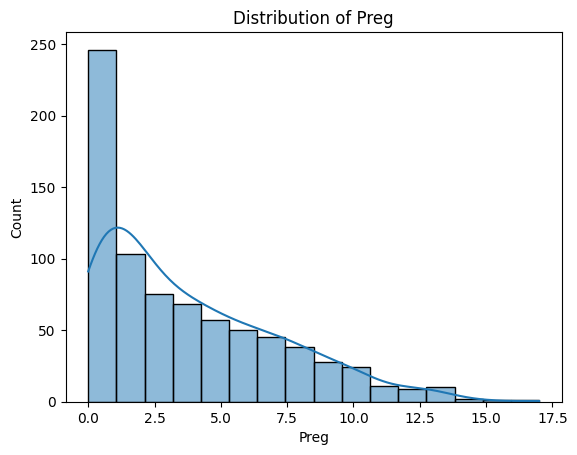

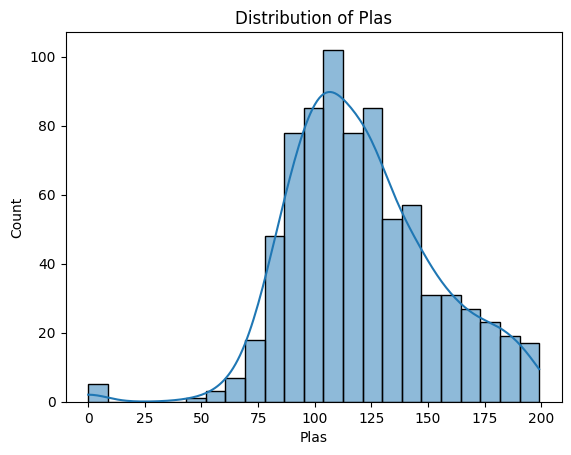

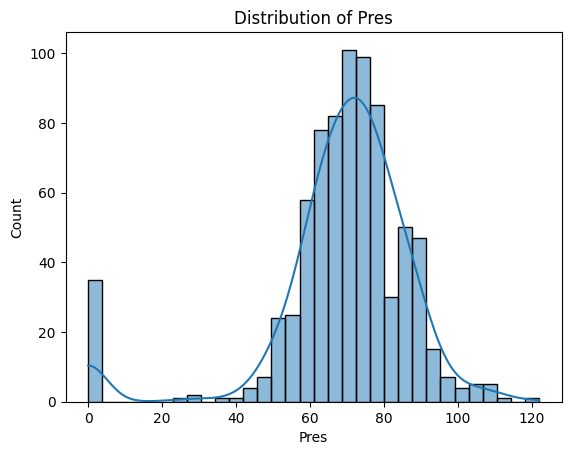

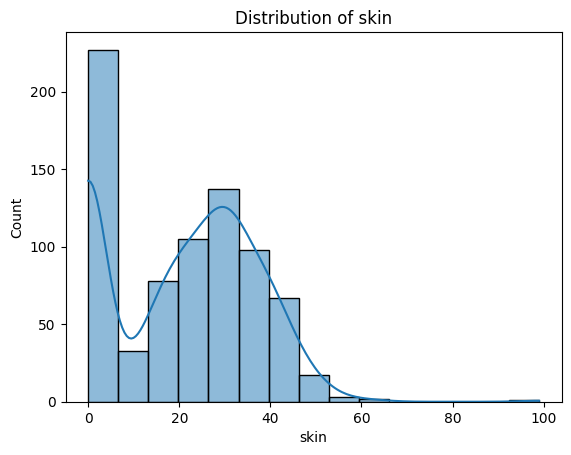

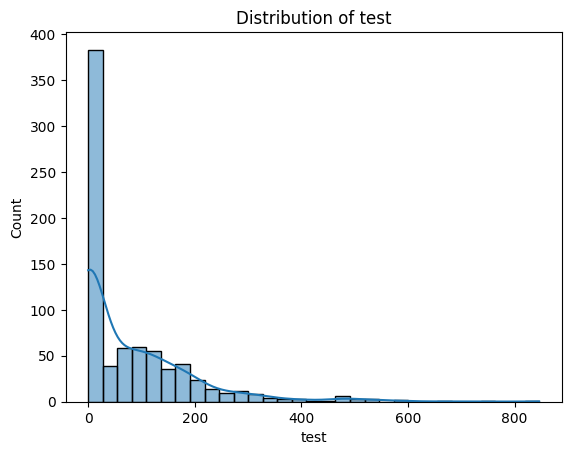

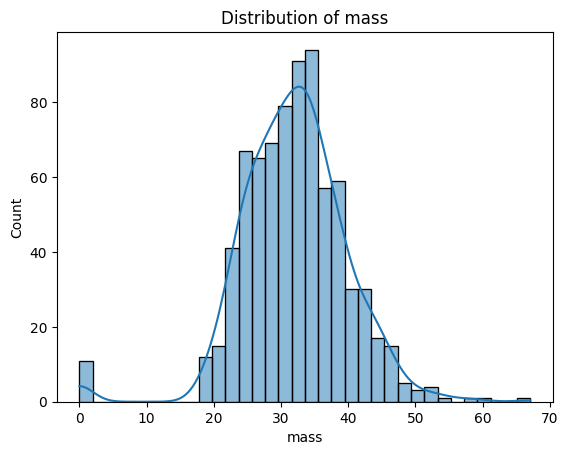

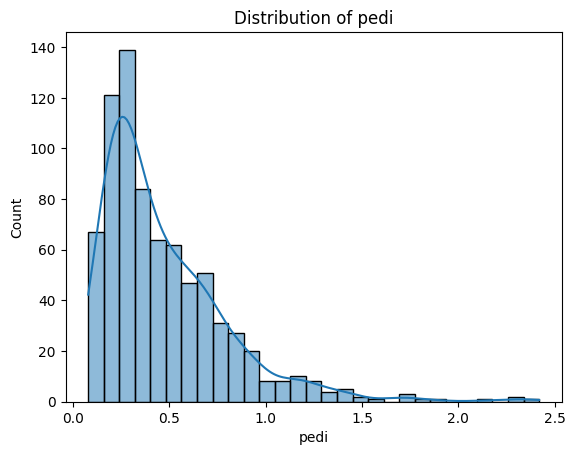

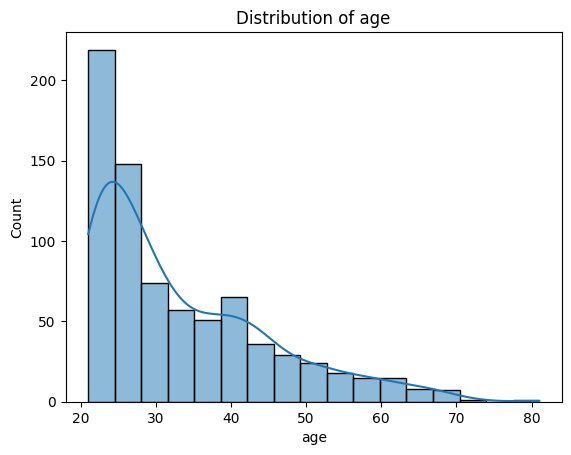

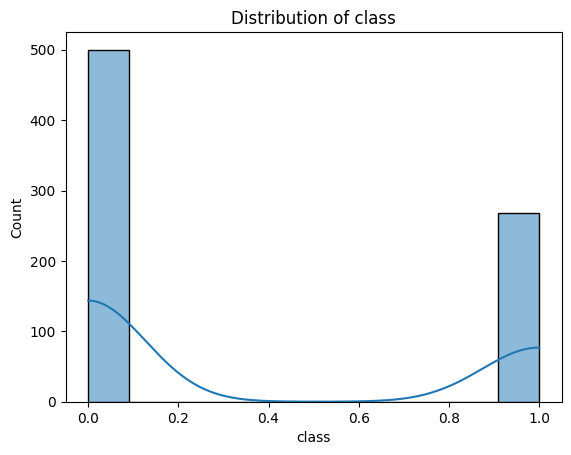

In [ ]:
#Histograms: (Visualize the distribution of numerical variables)
for col in dai_df.columns:
     if dai_df[col].dtype != "object": # Exclude non-numeric columns if any
         plt.figure()
         sns.histplot(dai_df[col],kde=True) # kde adds a kernel density estimate curve
         plt.title(f'Distribution of {col}')
         plt.show()

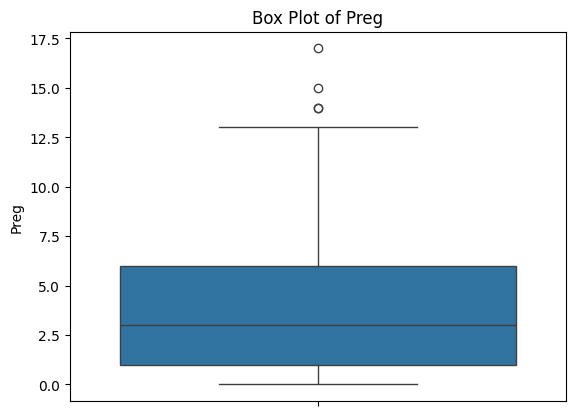

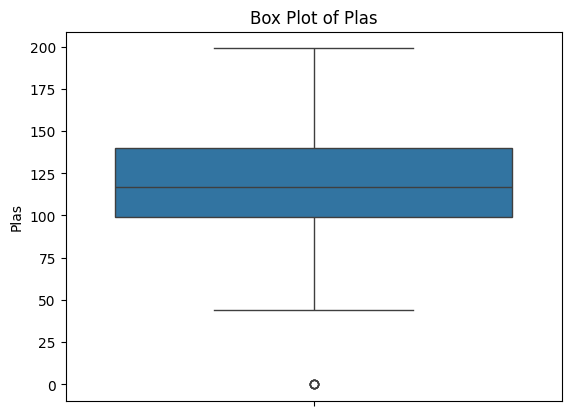

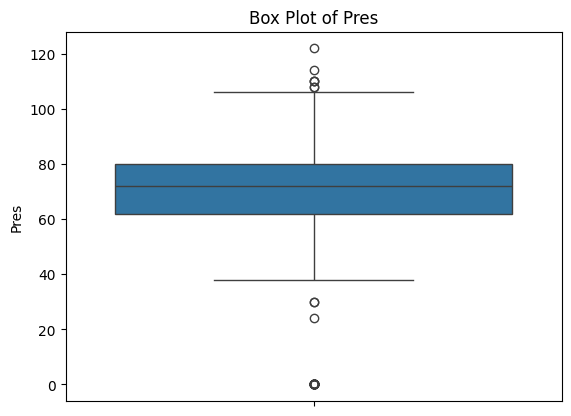

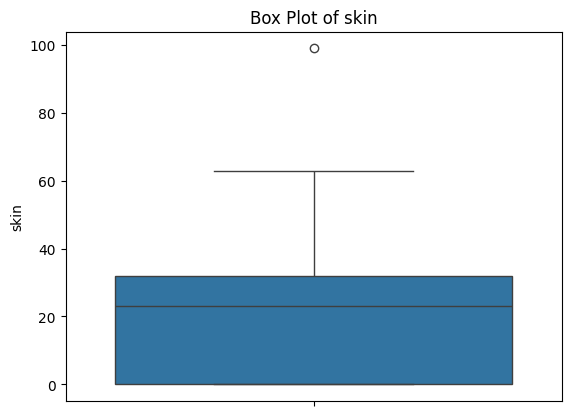

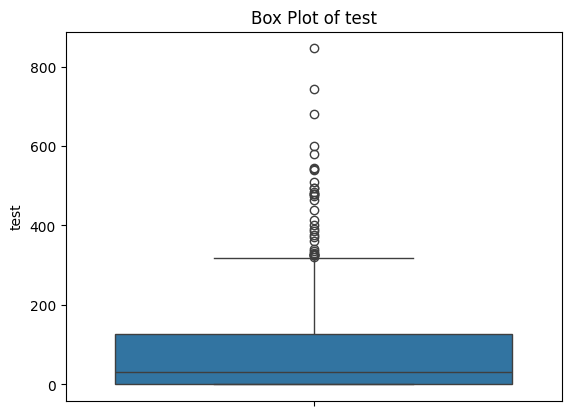

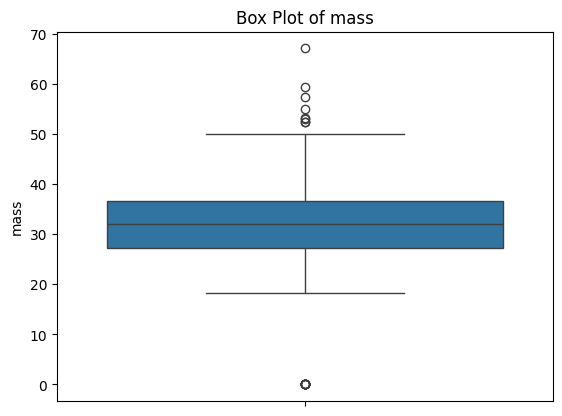

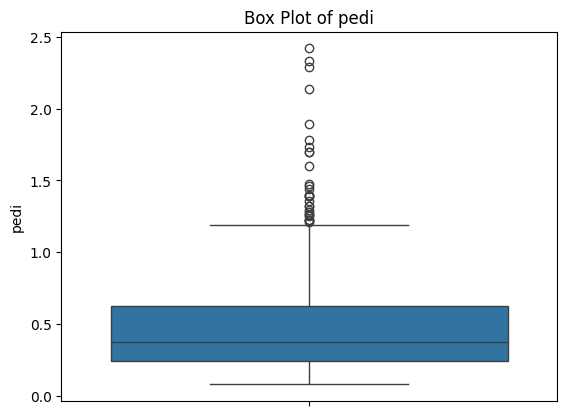

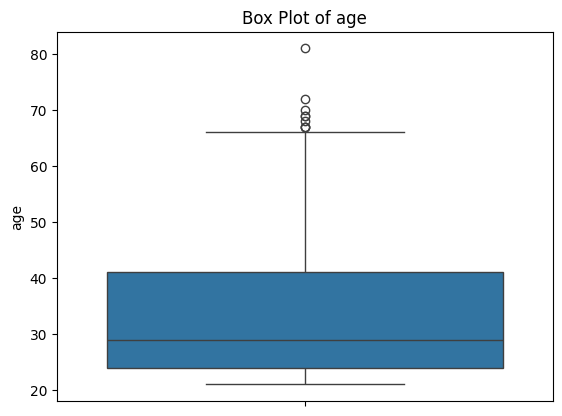

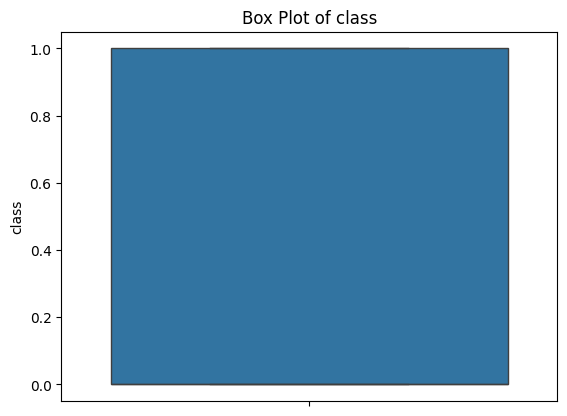

In [ ]:
#Box Plots: (Identify potential outliers and distribution skewness)
for col in dai_df.columns:
    if dai_df[col].dtype != 'object':
        plt.figure()
        sns.boxplot(y=dai_df[col])
        plt.title(f'Box Plot of {col}')
        plt.show()

In [ ]:
#Frequency Tables (for categorical variables)
# Example for the 'class' variable (assuming it's categorical):

dai_df["class"].value_counts()

,count
class,
0,500
1,268


In [ ]:
# Let us look at the target column which is 'class' to understand how the data is distributed amongst the various values
dai_df.groupby(["class"]).count()
# Most are not diabetic. The ratio is almost 1:2 in favor or class 0.  The model's ability to predict class 0 will
# be better than predicting class 1.

,Preg,Plas,Pres,skin,test,mass,pedi,age
class,,,,,,,,
0,500,500,500,500,500,500,500,500
1,268,268,268,268,268,268,268,268


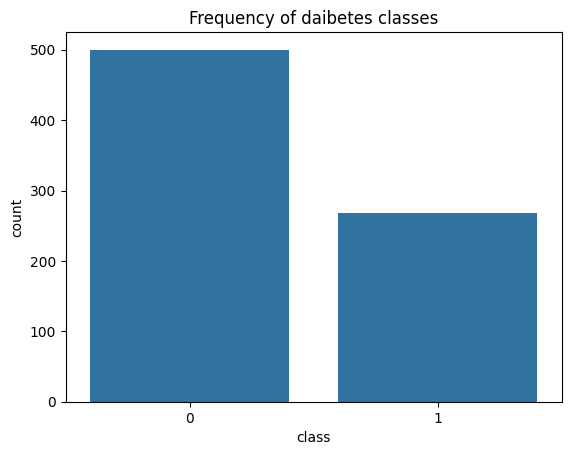

In [ ]:
#Bar Charts (for categorical variables):
plt.figure()
sns.countplot(x='class',data=dai_df)
plt.title('Frequency of daibetes classes')
plt.show()

# **Bivariate Analysis**

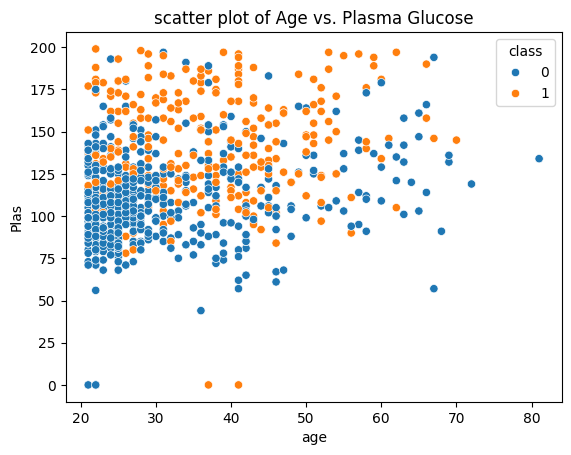

In [ ]:
#Scatter Plots: Visualize the relationship between two numerical variables
sns.scatterplot(x='age',y='Plas',data=dai_df,hue='class')
plt.title('scatter plot of Age vs. Plasma Glucose')
plt.show()

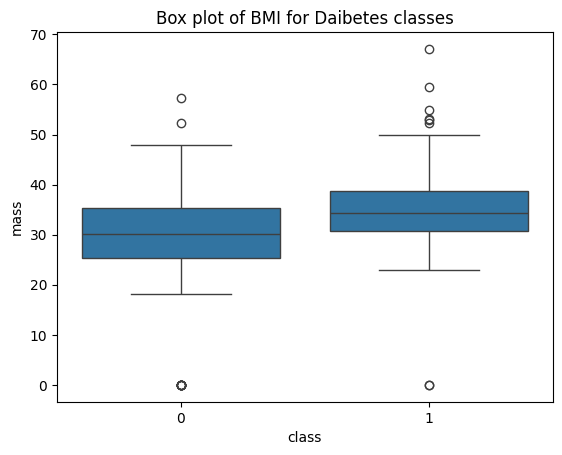

In [ ]:
sns.boxplot(x='class',y='mass',data=dai_df)
plt.title('Box plot of BMI for Daibetes classes')
plt.show()

In [ ]:
pd.crosstab(dai_df['Preg'],dai_df['class'])

class,0,1
Preg,,
0,73,38
1,106,29
2,84,19
3,48,27
4,45,23
5,36,21
6,34,16
7,20,25
8,16,22


# **Multivariate Analysis**

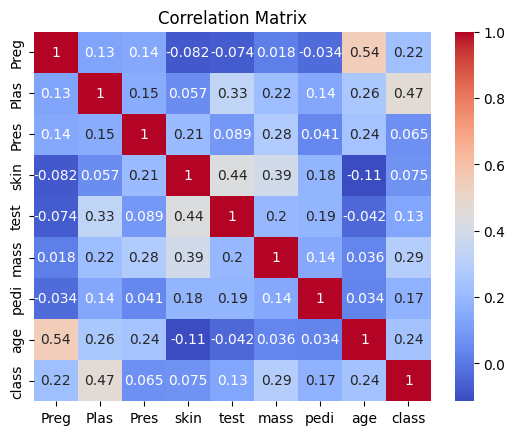

In [ ]:
#Heatmap (Correlation Matrix):
correlation_matrix=dai_df.corr()
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

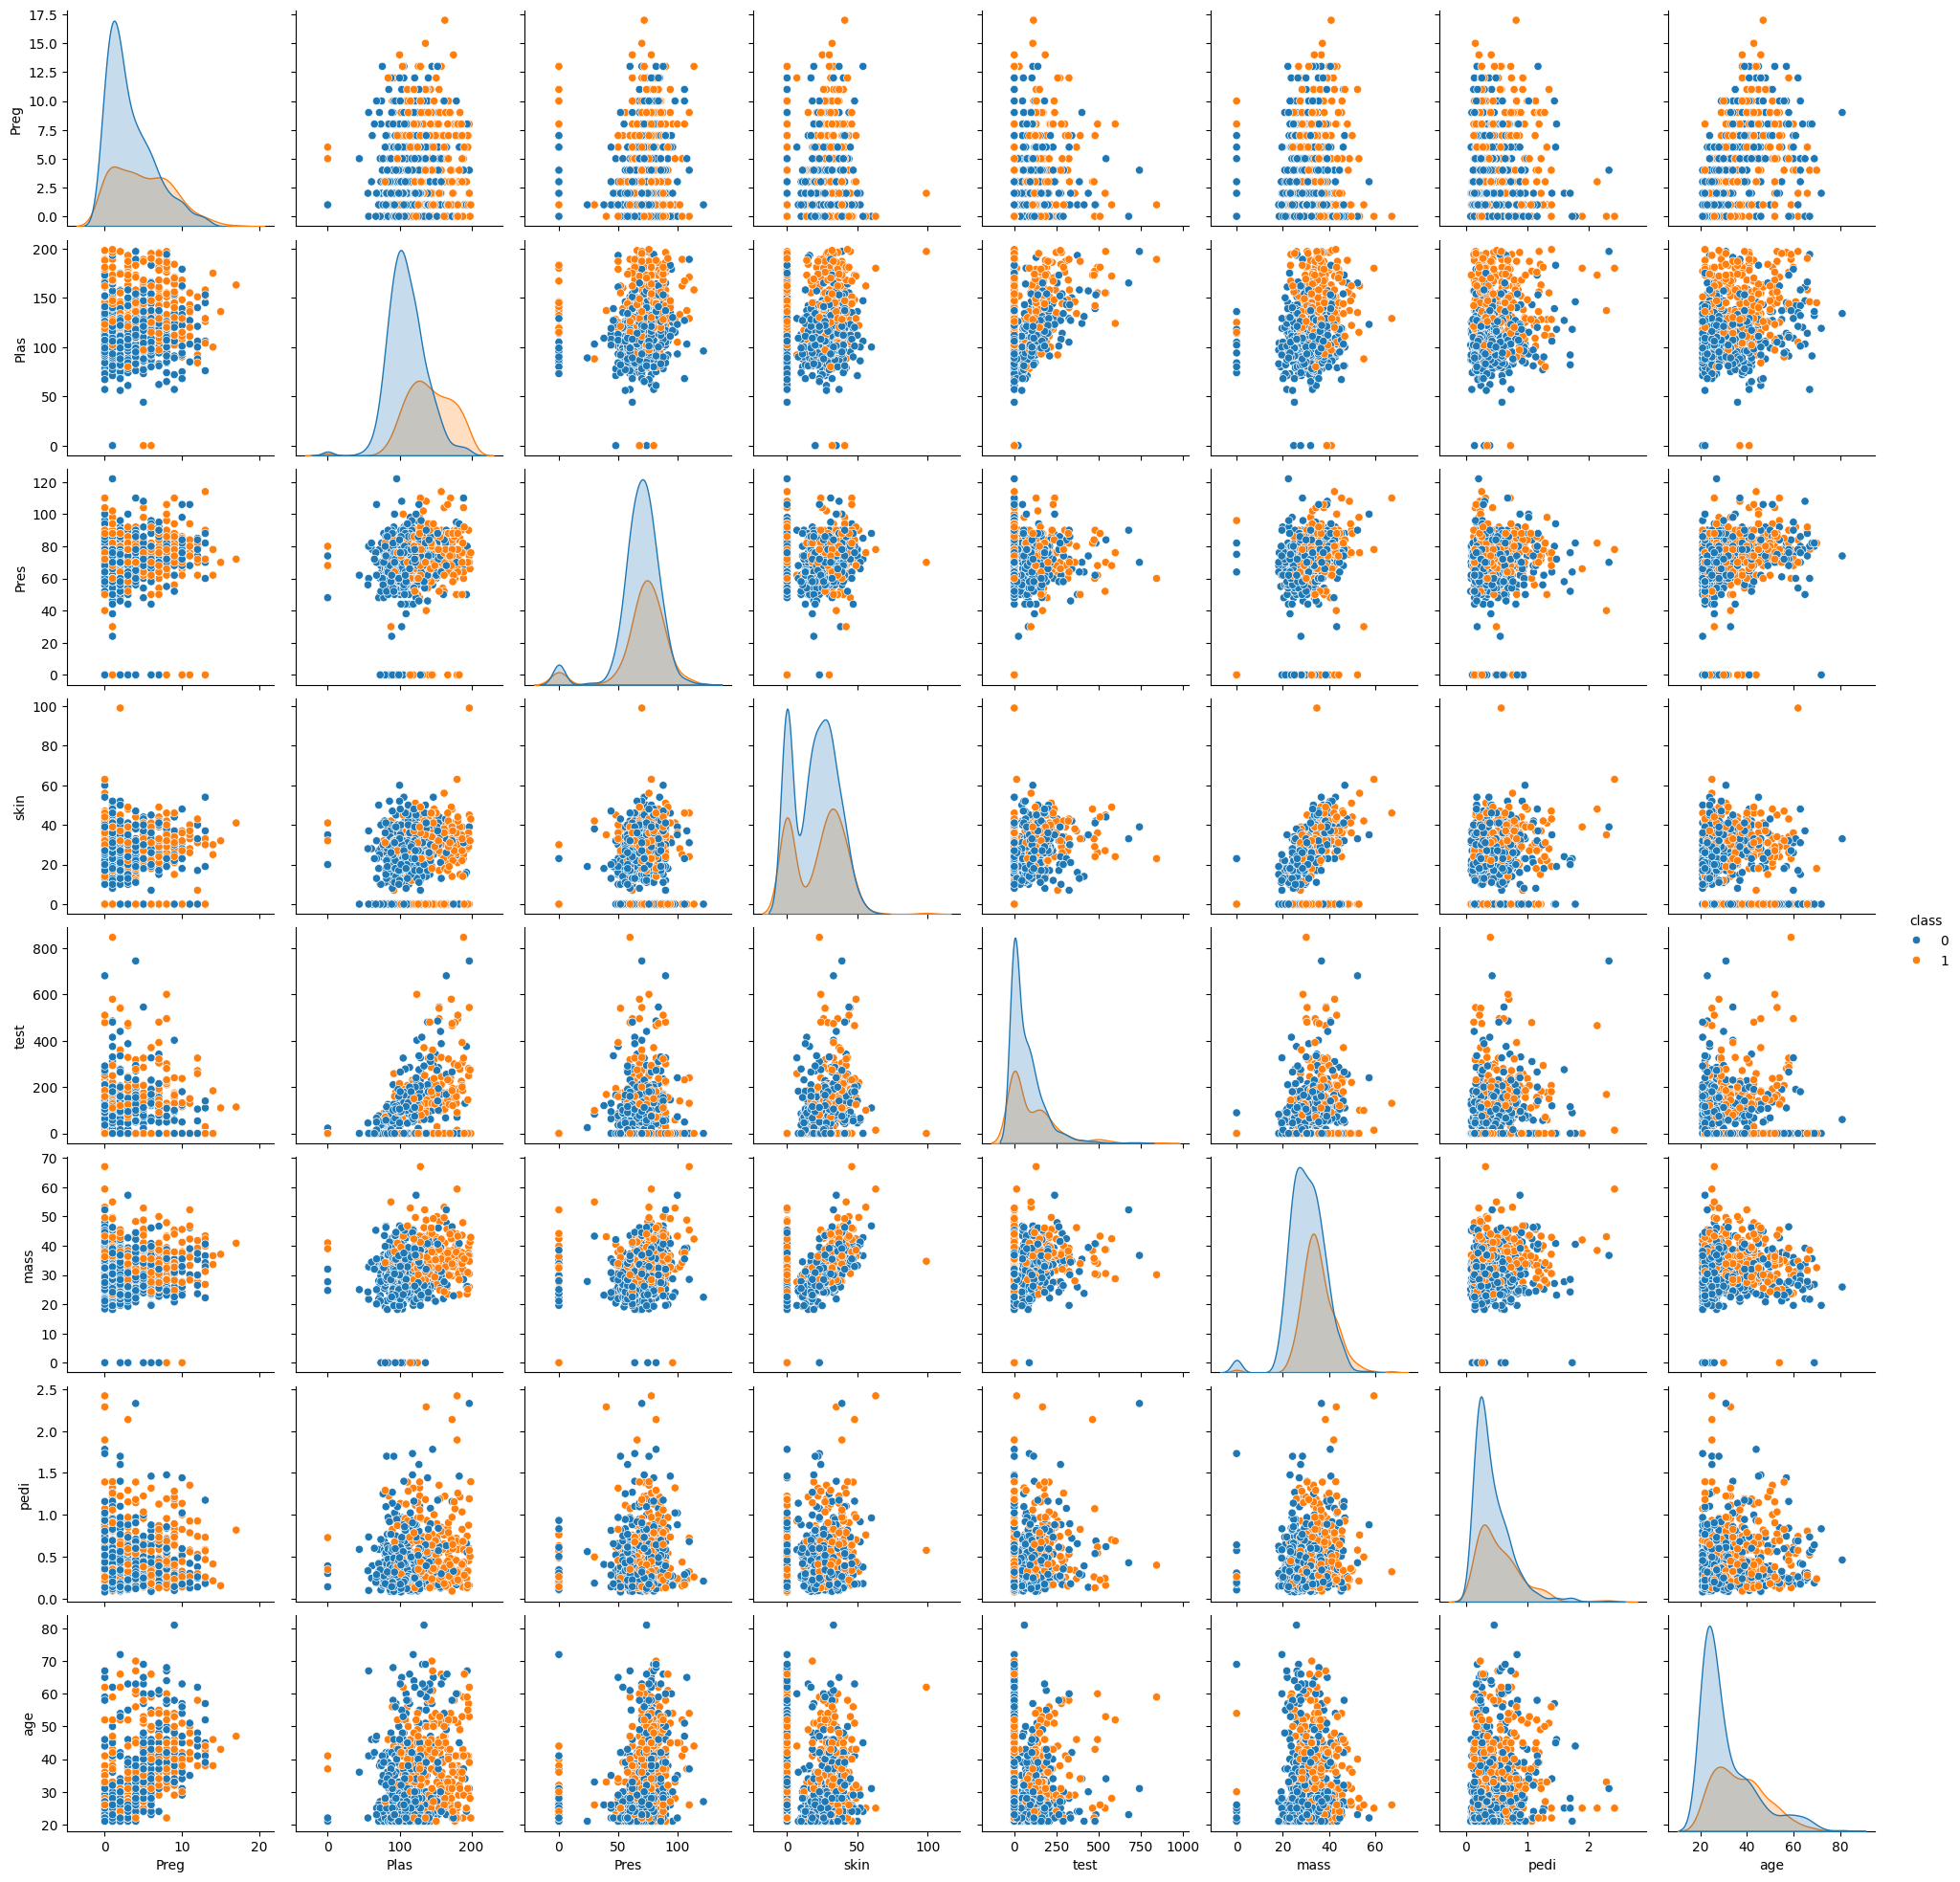

In [ ]:
#Pair Plot: Creates scatter plots for all pairs of numerical variables in the dataset, along with histograms for individual variables.
sns.pairplot(dai_df,hue='class') # 'class' is used for color-codin
plt.show()

In [ ]:
# Let us do a correlation analysis among the different dimensions and also each dimension with the dependent dimension
# This is done using scatter matrix function which creates a dashboard reflecting useful information about the dimensions
# The result can be stored as a .png file and opened in say, paint to get a larger view

#pima_df_attr = pima_df.iloc[:,0:9]

#axes = pd.plotting.scatter_matrix(pima_df_attr)
#plt.tight_layout()


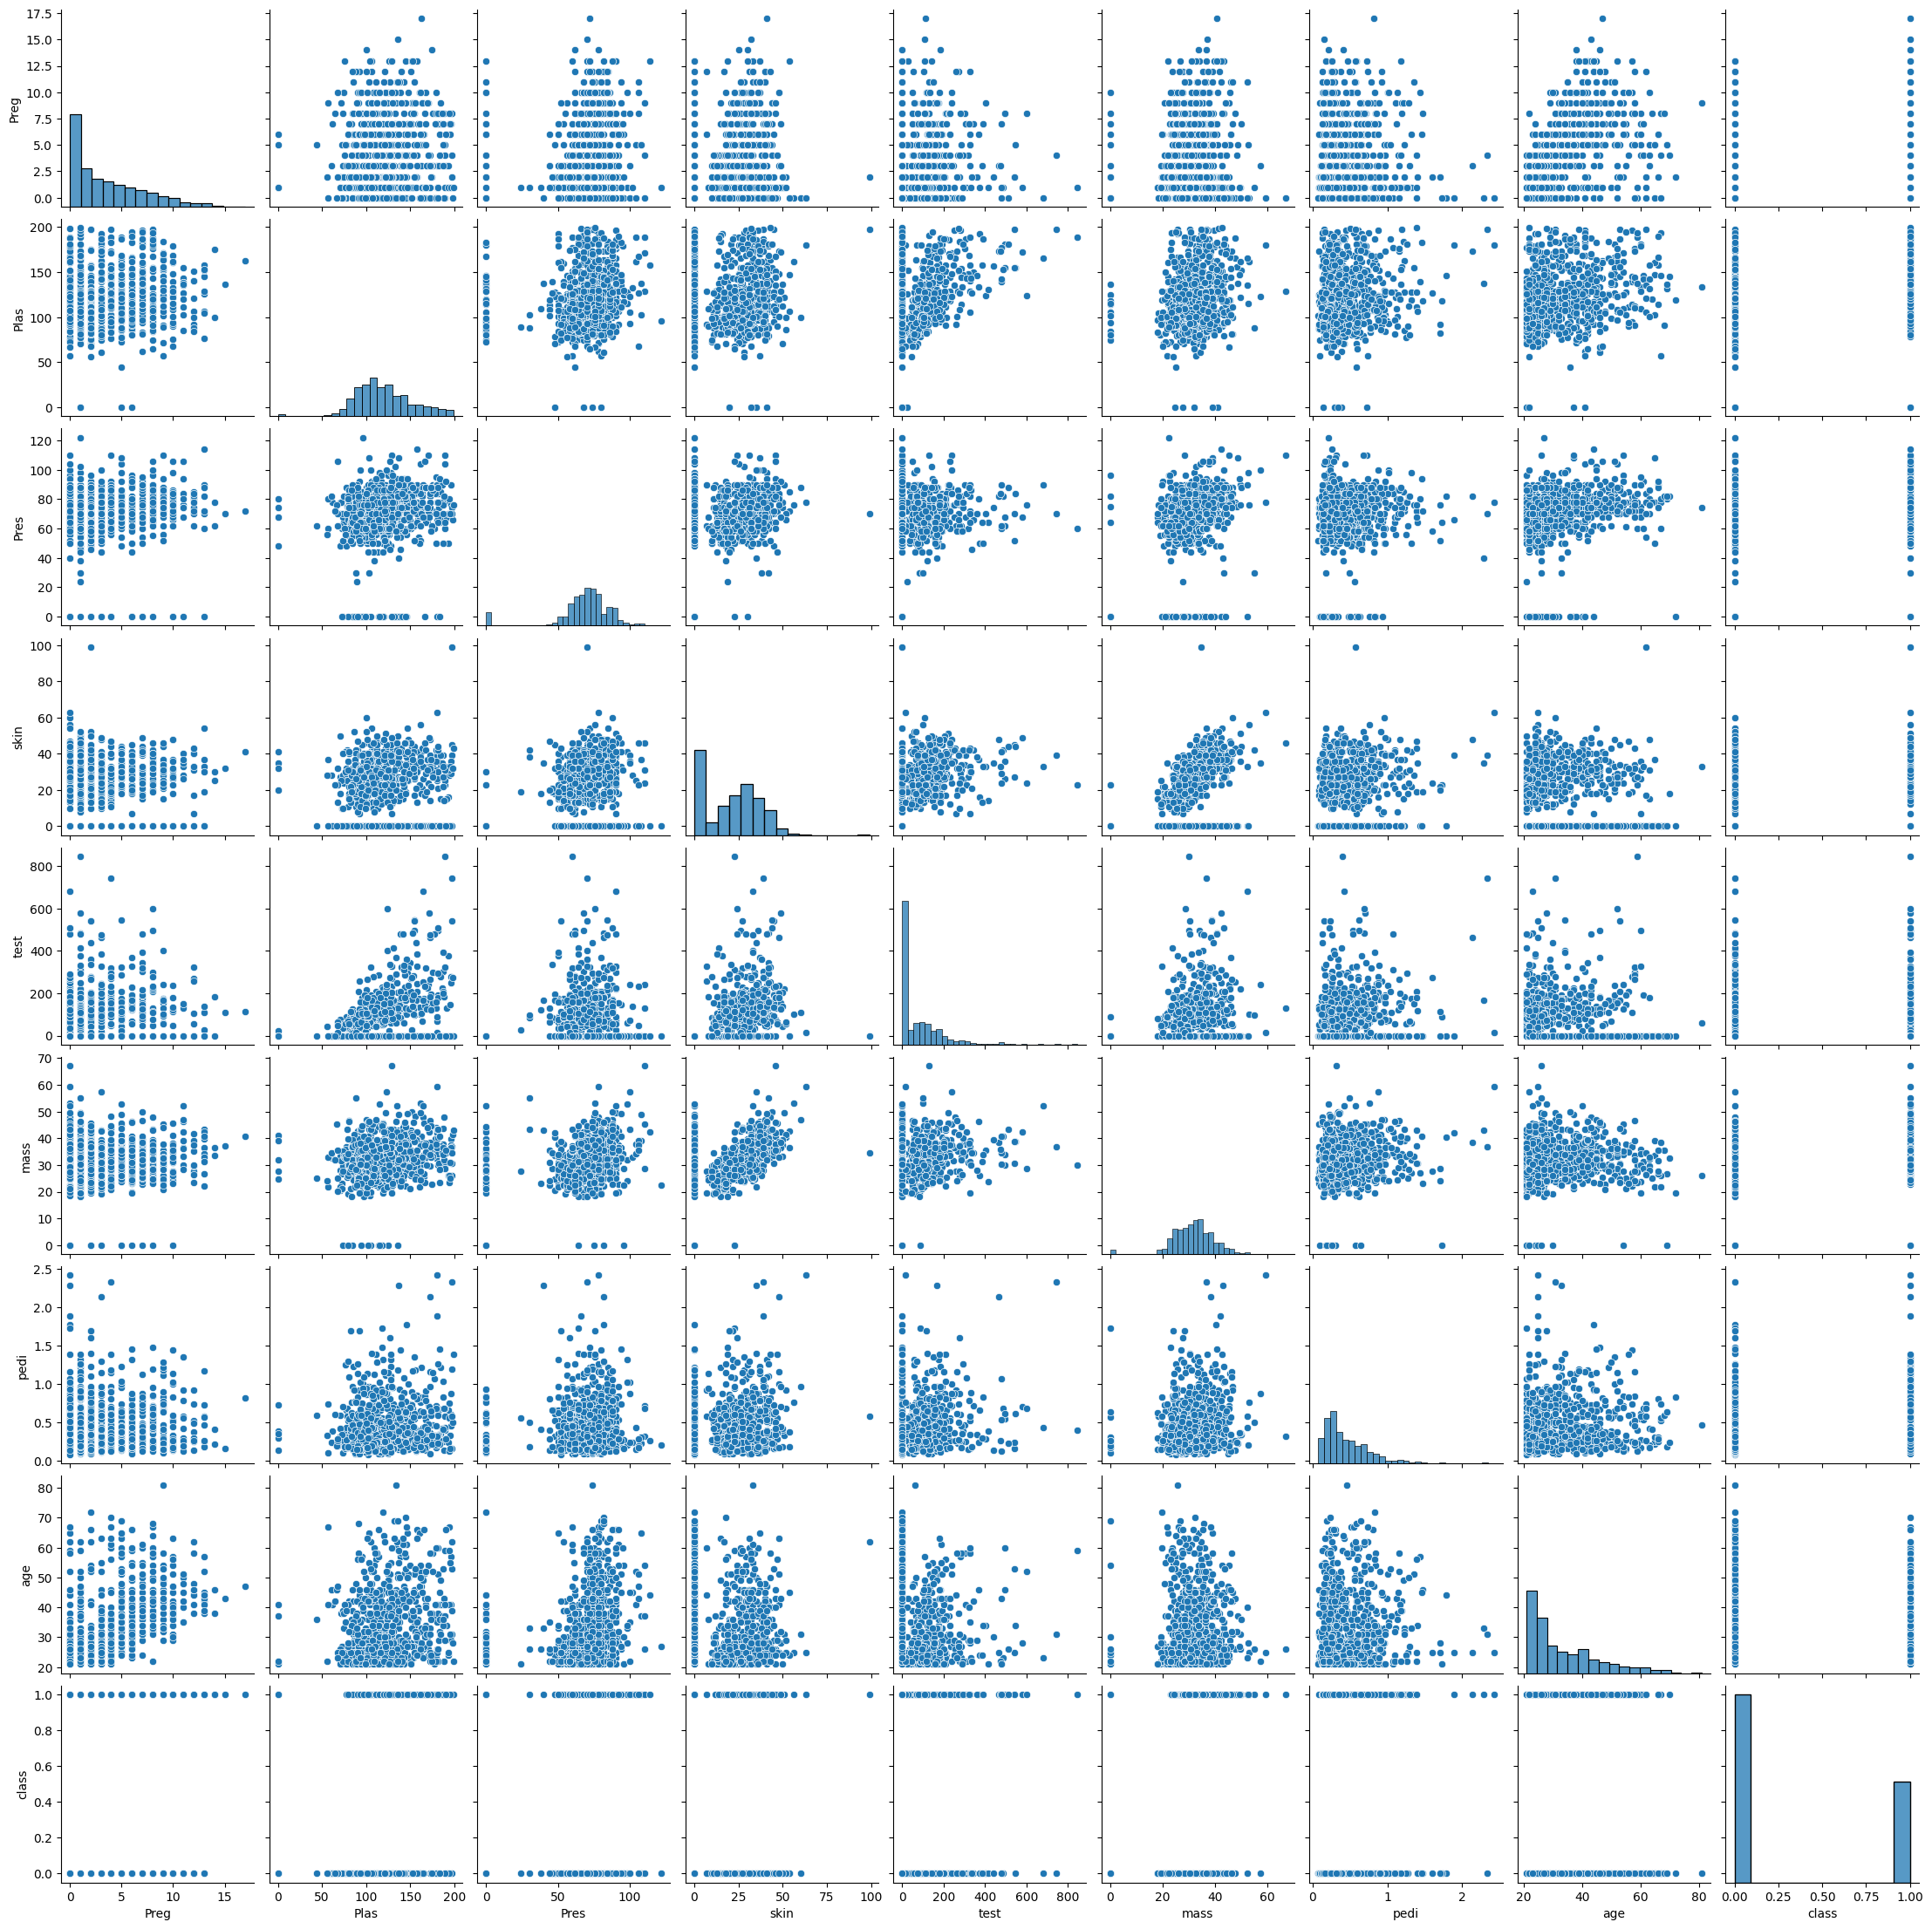

In [ ]:
# Pairplot using sns
sns.pairplot(dai_df)

# **Model Building**

In [ ]:
#Observations:
#data for all the attributes are skewed, especially for the variable "test"

#The mean for test is 80(rounded) while the median is 30.5 which clearly indicates an extreme long tail on the right


In [ ]:
# Attributes which look normally distributed (plas, pres, skin, and mass).
# Some of the attributes look like they may have an exponential distribution (preg, test, pedi, age).
# Age should probably have a normal distribution, the constraints on the data collection may have skewed the distribution.

# There is no obvious relationship between age and onset of diabetes.
# There is no obvious relationship between pedi function and onset of diabetes.


In [ ]:
array=dai_df.values
x=dai_df.iloc[:,0:8]
y=dai_df.iloc[:,8]
#X = array[:,0:8] # select all rows and first 8 columns which are the attributes
#Y = array[:,8]   # select all rows and the 8th column which is the classification "Yes", "No" for diabeties
test_size=0.30 # taking 70:30 training and test set
seed=1  # Random numbmer seeding for reapeatability of the code
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=test_size,random_state=seed)

In [ ]:
# fit the model on 30%
model=LogisticRegression()
model.fit(x_train,y_train)
y_predict=model.predict(x_test)
# Get the feature names from X_train
t=x_train.columns

coef_df=pd.DataFrame(model.coef_,columns=t)
coef_df['intercept']=model.intercept_[0]
print(coef_df)

       Preg      Plas     Pres      skin      test      mass      pedi  \
0  0.101192  0.033552 -0.01572 -0.001379 -0.000693  0.089425  0.559054   

       age  intercept  
0  0.01709  -7.861948  


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
model_score=model.score(x_test,y_test)
print(model_score)
print(metrics.confusion_matrix(y_test,y_predict))

0.7835497835497836
[[132  14]
 [ 36  49]]


**Understanding the Matrix**

True Positives (TP): 48 - The model correctly predicted 48 individuals as having diabetes (class 1).


True Negatives (TN): 132 - The model correctly predicted 132 individuals as not having diabetes (class 0).


False Positives (FP): 14 - The model incorrectly predicted 14 individuals as having diabetes when they actually did not (Type I error).


False Negatives (FN): 37 - The model incorrectly predicted 37 individuals as not having diabetes when they actually did (Type II error).

**Key Metrics**

Based on these values, we can calculate several important performance metrics:

Accuracy: (TP + TN) / (TP + TN + FP + FN) = (48 + 132) / (48 + 132 + 14 + 37) = 0.7792

This indicates that the model correctly predicted the diabetes status for approximately 77.92% of the individuals in the test set.

Precision: TP / (TP + FP) = 48 / (48 + 14) = 0.7742

Of all the individuals predicted as having diabetes, 77.42% actually had diabetes.

Recall (Sensitivity): TP / (TP + FN) = 48 / (48 + 37) = 0.5647

Of all the individuals who actually had diabetes, the model correctly identified 56.47% of them.

Specificity: TN / (TN + FP) = 132 / (132 + 14) = 0.9041

Of all the individuals who did not have diabetes, the model correctly identified 90.41% of them.

F1-Score: 2 * (Precision * Recall) / (Precision + Recall) = 2 * (0.7742 * 0.5647) / (0.7742 + 0.5647) = 0.6522